In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9]=1
y[digits.target!=9]=0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

d:\plugins\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


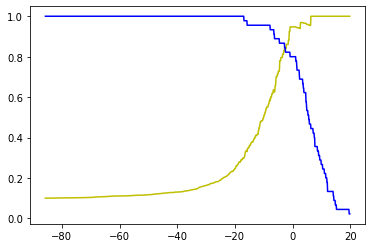

In [5]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))
plt.plot(thresholds, precisions, color='y')
plt.plot(thresholds, recalls, color='b')
plt.show()

### Precision-Recall 曲线

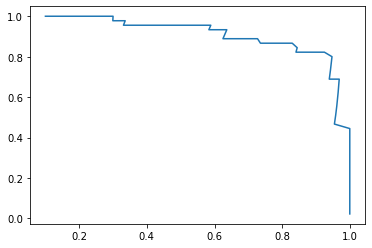

In [6]:
plt.plot(precisions, recalls)
plt.show()

### sklearn 中的Precision-Recall曲线

In [12]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [13]:
precisions.shape

(151,)

In [14]:
recalls.shape

(151,)

In [15]:
thresholds.shape

(150,)

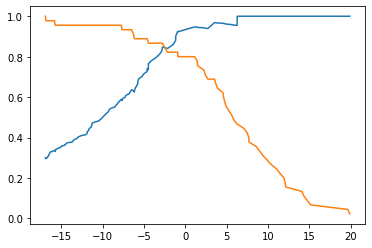

In [16]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

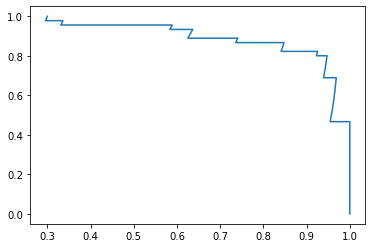

In [17]:
plt.plot(precisions, recalls)
plt.show()